In [94]:
#Import libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
print("done")

done


# **Exploratory Data Analysis (EDA)**

In [95]:
#Read dataset
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In this dataset we have 10.000 dataset and 12 columns, before we dive more into our dataset, we have to know the insight we can get from each variable.
explanation each columns:

1. customer_id: unique ID for each customer
2. credit_score: customer's credit score.
3. country: customer's country (categorical feature).
4. gender: customer's gender (categorical feature).
5. age: customer's age.
6. tenure: number of years the customer has been with the bank. -> nasabah
7. balance: customer's bank account balance.
8. products_number: number of products the customer has purchased. -> beli barang
9. credit_card: whether the customer has a credit card (1=Yes, 0=No).
10. active_member: Whether the customer is an active member (1=Yes, 0=No).
11. estimated_salary: customer's estimated salary.
12. churn: whether the customer churned (1=Yes, 0=No) -> Target variable.

In [96]:
#Showing our variable data type
print(data.dtypes)

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


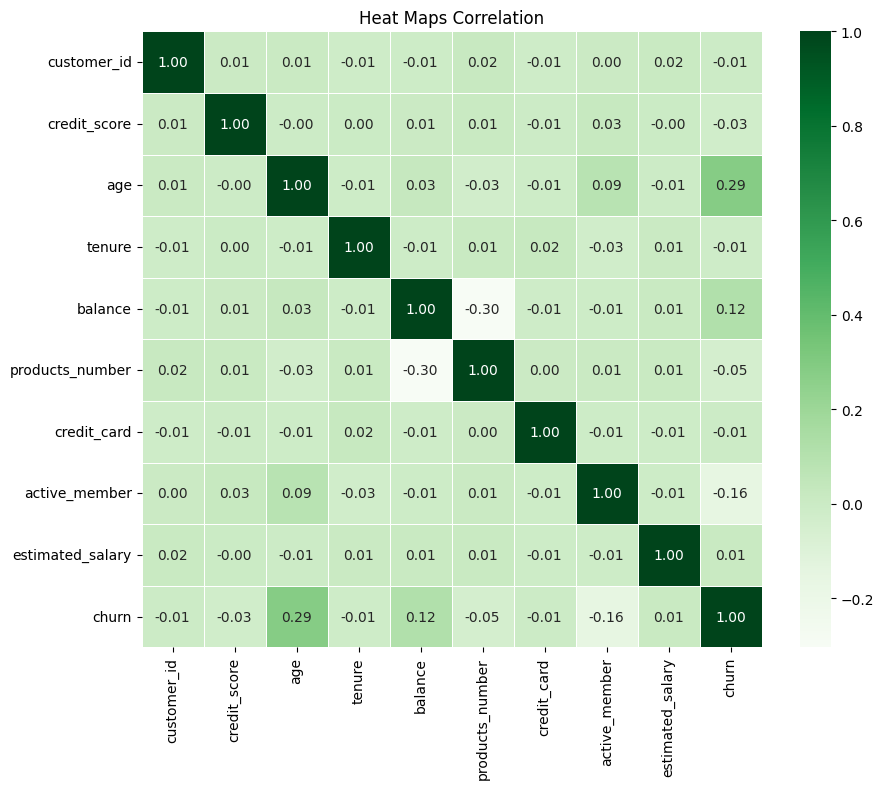

In [97]:
#Heat maps visualization (correlation)
num_columns = data.select_dtypes(include=['float64','int64']) #except object
corr_matrix = num_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Heat Maps Correlation')
plt.show()

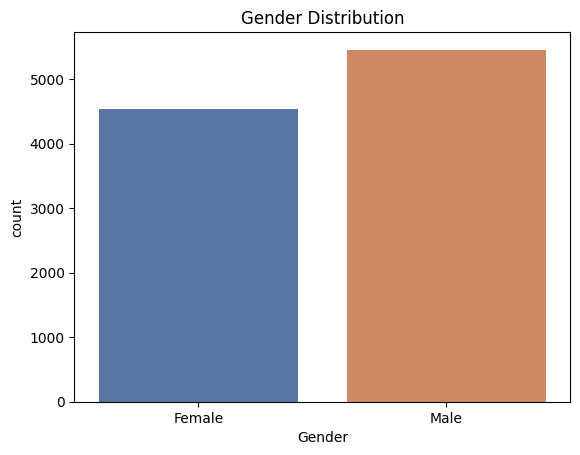

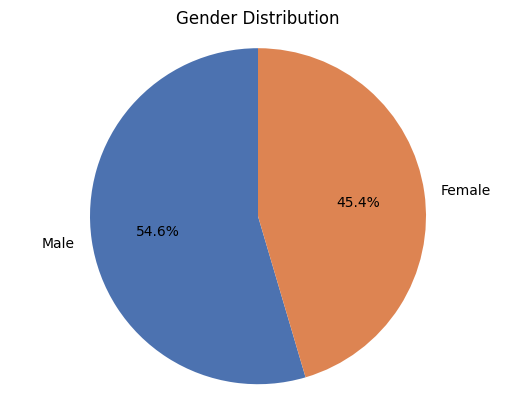

In [98]:
# ploting insight

# bar plot
sns.countplot(x='gender', data=data, palette= "deep")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

# pie chart for more detailed gender
gender_counts = data['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = sns.color_palette("deep")

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # equal = circle
plt.title('Gender Distribution')
plt.show()

> Insight: even the percentage of male contribute is more bigger than female




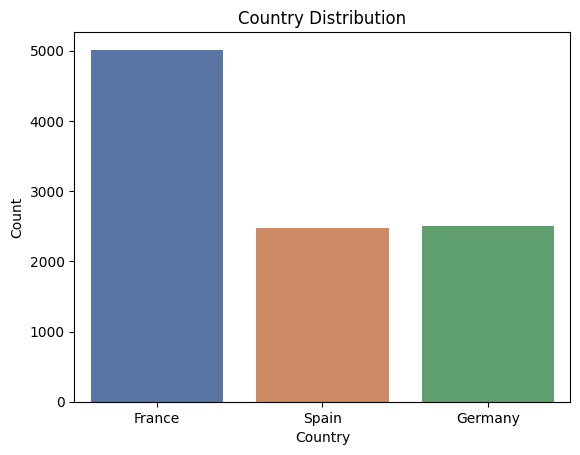

In [99]:
# barplot for country
sns.countplot(x='country', data=data, palette= "deep")
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()



> insight: from plot indicating bank has the most customers in France followed by germany and Spain



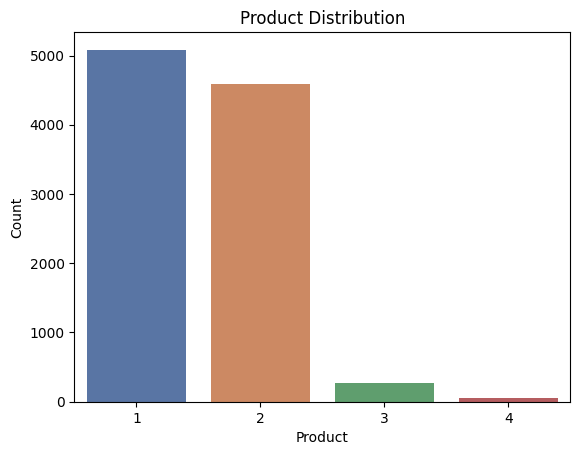

In [100]:
# barplot for products number
sns.countplot(x='products_number', data=data, palette= "deep")
plt.title('Product Distribution')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()



> people usually purchased 1 or 2 products and more products offered will be impact number of customer count



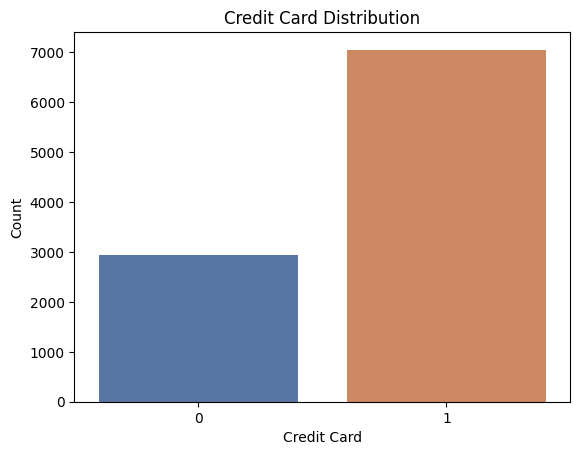

In [101]:
# barplot for credit card
sns.countplot(x='credit_card', data=data, palette= "deep")
plt.title('Credit Card Distribution')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()



> insight: people is commonly to have credit card rather than not having it



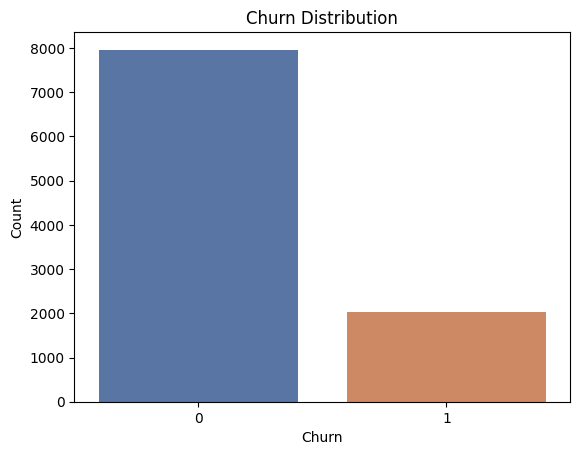

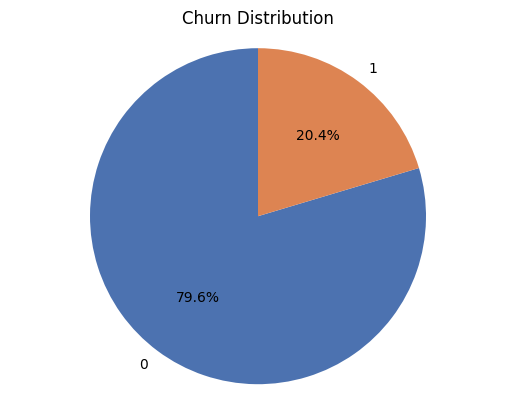

In [102]:
# barplot for churn
sns.countplot(x='churn', data=data, palette= "deep")
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# piechart for churn more detailed
churn_counts = data['churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = sns.color_palette("deep")

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # equal = circle
plt.title('Churn Distribution')
plt.show()



> insight: this data is imbalanced showing that bank's customer who stayed bigger than those left


# **Preprocessing Data**

### **Checking Missing Values**

In [103]:
# showing missing data in dataset.
data.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


> based on result above, the dataset is clean



## **Feature scalling**
> Do scaling and encoders after we split the data to prevent data leakage

#### **Normalization**
---
> When the data have no outliers commonly used for models such as: KNN, SVM, Neural Networks
---
#### **Standardization**
---
> Transform data to have mean of 0 and std of 1. When data has outliers, commonly used for models such as: logistic regression, linear regression, SVM, PCA, Neural Networks
---
#### **No need to Normalization/Standardization when:**
---
> Using Decision Trees, Random Forests, XGBOost, LightGBM, which has little to no effect on performance model


### **Spliting dataset**

In [104]:
# from sklearn.model_selection import train_test_split
X = data.drop(columns=['churn', 'customer_id'])  #dropping churn because it is target variable, and customer id is dropped because doesn't contain useful information
y = data['churn']  # target variable

# 80 % train, 20 % test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Encoding**
---
to transform categorical variable into numerical, in this case is country, gender (object)

In [105]:
data = pd.get_dummies(data, columns=['country', 'gender'], drop_first=True)

In [106]:
data.head(10)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
5,15574012,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True
6,15592531,822,50,7,0.00,2,1,1,10062.80,0,False,False,True
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,True,False,False
8,15792365,501,44,4,142051.07,2,0,1,74940.50,0,False,False,True
9,15592389,684,27,2,134603.88,1,1,1,71725.73,0,False,False,True


### **Normalization/Standardization**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# seperate numeric and categorical features
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# pipelines for numeric and categorical
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# combine pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
])

# apply preprocessing to train and test data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Data preprocessing completed: Features standardized.")

Data preprocessing completed: Features standardized.


# **Train Model**

In [110]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# **Evaluate Model**

In [115]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

In [113]:
# result
print(f'Initial Model Accuracy: {accuracy * 100:.2f}%')
print('Initial Classification Report:')
print(classification_report_str)
print('Initial Confusion Matrix:')
print(confusion_matrix_result)

Initial Model Accuracy: 81.10%
Initial Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Initial Confusion Matrix:
[[1543   64]
 [ 314   79]]


# Explanation:
> The model's accuracy is 81.20%, meaning its correctly classified the samples. For class 0 (represent the majority class) the model perfoms well with precision 0.83, recall of 0.96, and F1-score 0.89, indicating a high accuracy in predicting this class. On the other hand, for class 1 (represent the minority class) the model struggles significantly, with precision 0.56, recall of 0.20, and F1-score of only 0.29, indicating model frequently misclassifies class 1
---
> The Confusion matrix further ilustrates imbalance, while misclassifying 316 as class 0, and only correctly identifies 77. This suggest the model is biased toward predicting class 0 due to the poor performance on class 1 and weighted averages with dominance of class 0 in the data.



# **Result**

# **BONUS**

## **3. Perform fine-tuning using GridSearchCV, explain the results**

In [116]:
# from sklearn.model_selection import GridSearchCV
# class sklearn.model_selection.GridSearchCV(estimator, param_grid, *,
# scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False) #sckit.learn

# xgbBoost
#search_space = {
#    "n_estimators": [100, 200, 500],
#    "max_depth": [3, 6, 9],
#    "gamma": [0.01, 0.1],
#    "learning_rate": [0.001, 0.01, 0.1, 1]
#}

# logistic regression
search_space = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

# gridsearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=search_space,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# fit the grid search into training data
grid_search.fit(X_train_scaled, y_train)

# get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score * 100:.2f}%")

# evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Model: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 81.09%
Test Accuracy with Best Model: 81.20%


## Explanation:
---
The model hyperparameter tuning process using 5-fold cross-validation to evaluate 12 different combinations of parameters, resulting total 60 fits. The best performing parameters is C=0.1 with an 11 penalty, using liblinear solver achieving highest accuracy of 81.09% during cross-validation. the model's in test set slightly improved to 81.20% indicating selected parameters generalize well to unseen data dan perform consistenly.

